# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [30]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Let's see how the dataframe looks like

In [31]:
original_data = pd.read_csv(r"C:\Users\jprey\OneDrive\Escritorio\JP\KUL\5th Semester (Polimi)\MIT IDSS\Classification and Hypothesis Testing\Extraa_learn.csv")
data = original_data.copy()

In [32]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [34]:
data.drop_duplicates(inplace=True)

### Observations from Data Overview:
- 4612 datapoints (rows), 15 categories colected (columns)
- No Duplicates, no null values
- Only Age, Website Visits, Time Spent On Website, Page Views Per Visit and Status are numerical values. Although status is binary classification rather than a numerical datatype.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [35]:
# The first column will not be helpful for our analysis.
data = data.drop("ID", axis=1)
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [36]:
# Making a list of all catrgorical variables
categorical_columns = list(data.select_dtypes("object").columns)
categorical_columns.append("status")

# Printing the different filled in values per categorical category
for column in categorical_columns:
    print(data[column].value_counts())
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

#### Observations:
- The data answers seems coherent suggesting a clean dataset.
- Each column has 2 or 3 answers at most. This categorical columns can be used to "hue" the different plots.

### Univariate Analysis


#### Function to generate a Box Plot on top of a Histogram.

In [37]:
# function to plot a boxplot and a histogram along the same scale for valuable visualization

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe going to be used
    feature: dataframe column to be evaluated
    figsize: size of the figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    # For the histogram
    if bins: # If bins parameter is passed
        sns.histplot(data=data, x=feature, kde=kde, bins=bins, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=kde)
    # Vertical line for the mean    
    plt.axvline(data[feature].mean(), color="black", linestyle="-")
    # Vertical line for the median
    iqr = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    plt.axvline(data[feature].median(), color="green", linestyle="--")
    plt.axvline(data[feature].quantile(0.25), color="purple", linestyle="--")
    plt.axvline(data[feature].quantile(0.75), color="purple", linestyle="--")
    plt.axvline(data[feature].quantile(0.25) - 1.5*iqr, color="blue", linestyle="-.")
    plt.axvline(data[feature].quantile(0.75) + 1.5*iqr, color="blue", linestyle="-.")
    plt.show()

#### Let's explore the Age category

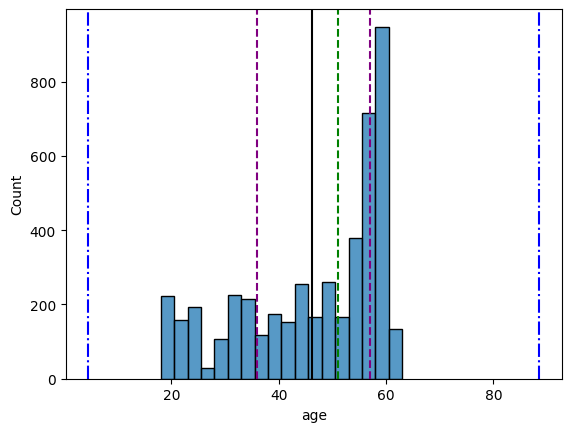

In [38]:
histogram_boxplot(data, "age")

##### Age values seem in order and no outlier treatment needed.

#### Let's explore the Time Spent on Website Category

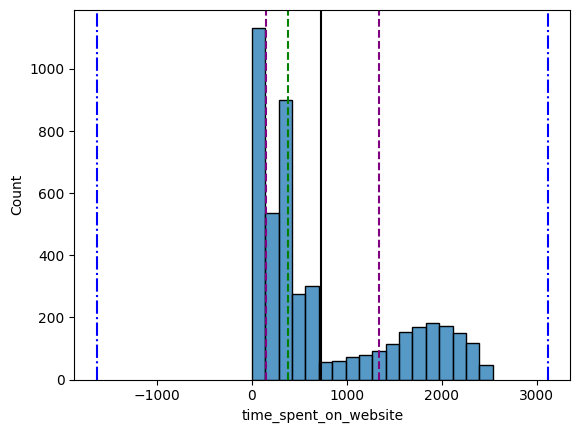

In [39]:
histogram_boxplot(data, "time_spent_on_website")

##### Time Spent on Website values seem in order and no outlier treatment needed. It is pertinent to mention that the distribution is rather bimodal.

#### Let's explore the Page Views per Visit Category

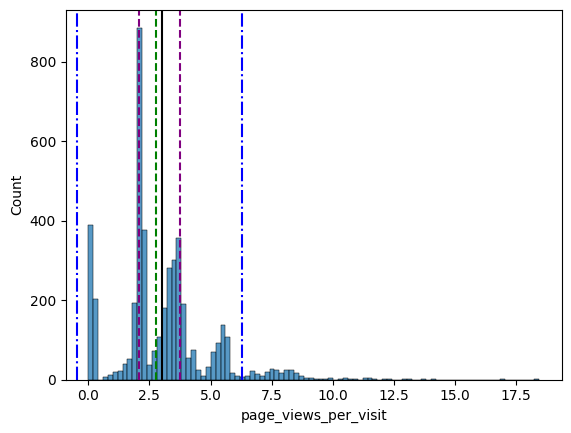

In [40]:
histogram_boxplot(data, "page_views_per_visit")

##### Page Views Per Visit values seem in order and no outlier treatment needed. The outliers come from some very frequent clients, which is understandable. The distribution is rather multimodal.

#### Let's consider the amount of Website Visits

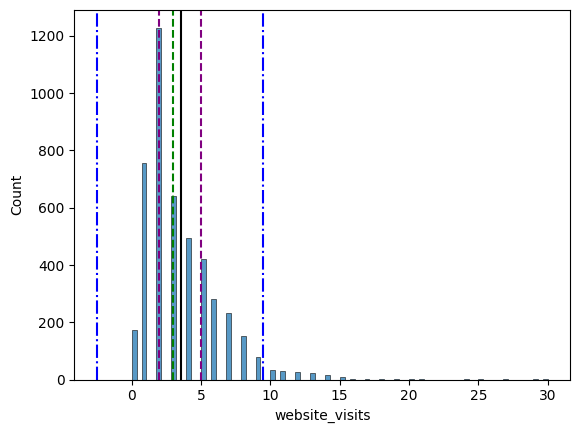

In [41]:
histogram_boxplot(data, "website_visits")

##### The distribution is right skewed. There are some outliers, but yet again, it makes sense for some visitors to visit the website a lot. No outliers treatment needed.

#### Let's proceed with the univariate analysis for categorical variables.

#### Function for Categorical Columns. Visualization of the distribution of values

In [82]:
# Function to create labeled barplots for categorical columns
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage label at the top

    data: dataframe to be considered
    feature: existing column in the dataframe to be considered
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    number_of_datapoints = len(data[feature])  # Total number of datapoints
    nr_of_categories = data[feature].nunique() # Counts the number of categories
    
    if n is None:
        plt.figure(figsize=(nr_of_categories + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="hls",
        order=data[feature].value_counts().index[:n].sort_values(),
        # column from dataframe => count the occurences per category =>...
        # ...=> get the first n elements (in n=None => index[:None]=index[:] => it gets all)... =>
        # ...=> sort them by alphabetical order of the categories.
    )
    xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()] # Store the name in a list
    print("-"*5, feature, "-"*5)

    for i, p in enumerate(ax.patches): # a patch is a bar <=> a category
        category_name = xtick_labels[i] # get the name
        if perc == True:
            # Formatted to one decimal place and percentage symbol included.
            # get_height() returns the height of the bar <=> instances of that category
            label = "{:.1f}%".format(100 * p.get_height() / number_of_datapoints)
        else:
            # get_height() returns the height of the bar <=> instances of that category
            label = p.get_height()
            print(f"{category_name}: {round(100*p.get_height()/number_of_datapoints, 1)}%")

        # Where to position the label
        # Horizontally: find the beginning of the bar, and add half of its length (centered)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()  # Vertically: Height of the bar

        # Writing the label
        ax.annotate(
        label,                # The text to display (either percentage or count)
        (x, y),               # Coordinates (x, y) where the text should be positioned
        ha="center",          # Horizontal alignment of the text relative to the (x, y) point
        va="center",          # Vertical alignment of the text relative to the (x, y) point
        size=12,              # Font size of the text
        xytext=(0, 5),        # Offset of the text from (x, y) in (x, y) coordinates
        textcoords="offset points"  # Interprets xytext as an offset in points (not data units)
        )

    plt.show()  # show the plot

##### Let's visualize each categorical column

----- current_occupation -----
Professional: 56.7%
Student: 12.0%
Unemployed: 31.2%


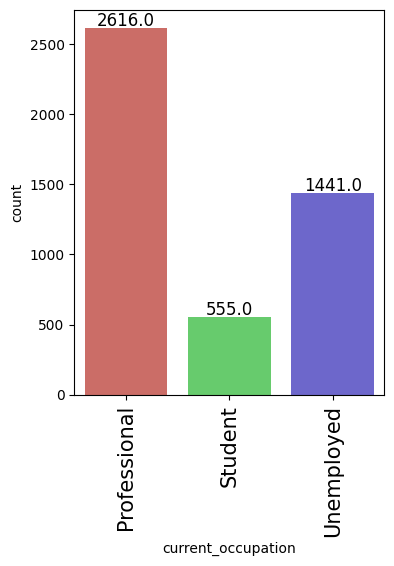

----- first_interaction -----
Mobile App: 44.9%
Website: 55.1%


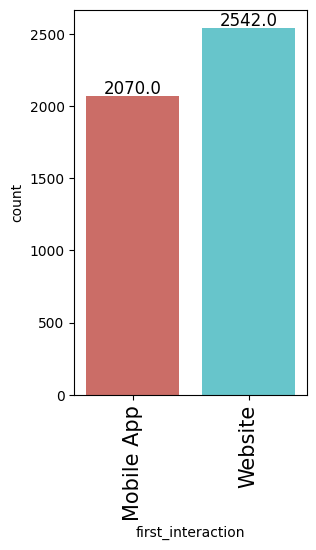

----- profile_completed -----
High: 49.1%
Low: 2.3%
Medium: 48.6%


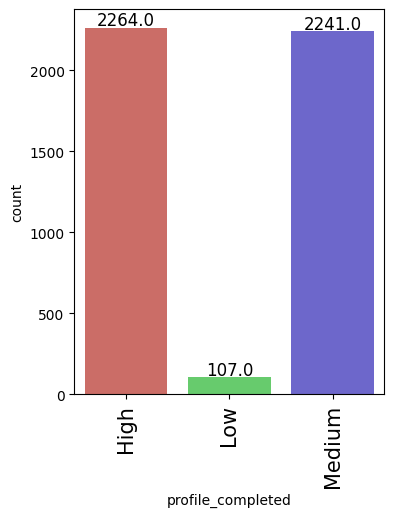

----- last_activity -----
Email Activity: 49.4%
Phone Activity: 26.8%
Website Activity: 23.9%


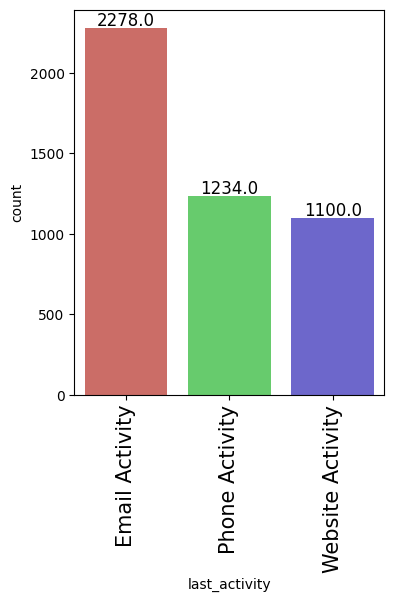

----- print_media_type1 -----
No: 89.2%
Yes: 10.8%


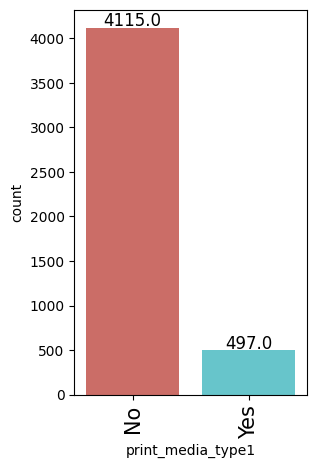

----- print_media_type2 -----
No: 94.9%
Yes: 5.1%


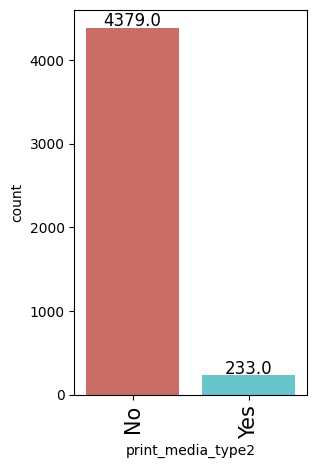

----- digital_media -----
No: 88.6%
Yes: 11.4%


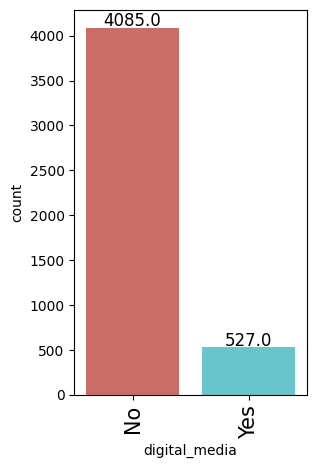

----- educational_channels -----
No: 84.7%
Yes: 15.3%


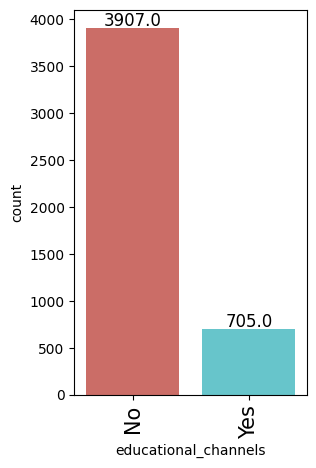

----- referral -----
No: 98.0%
Yes: 2.0%


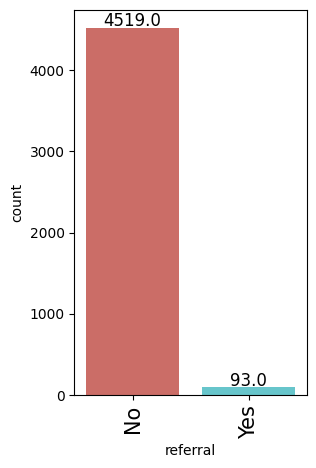

----- status -----
0: 70.1%
1: 29.9%


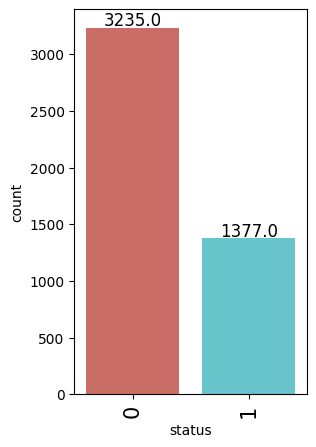

In [83]:
for category in categorical_columns:
    labeled_barplot(data, category)

#### Observations:
- 56% percent of interactions come from professionals. There is a strong number (31.2%) of interactions that come from unemployed people. It will be interesting to do a bivariate analysis considering the occupation and the status.
- Mobile App and Website are similarly used.
- Only ≈100 people have completed their profile less than 50%.
- Email interaction seems to have been the latest activity for most leads.
- Only 44.6% of leads heard/saw the program thanks to an ad/referral.
- Almost 30% of leads become paid customers.

### Bivariate Analysis
It is often helpful to begin the Bivariate Analysis with a Heatmap and a Pairplot

#### Heatmap

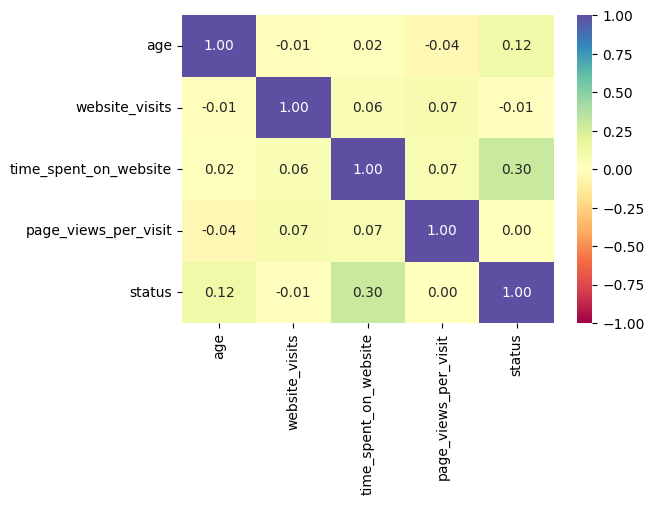

In [44]:
# Extract the numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Create plot using Matplotlib and Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
''' annot=True to visualize also the numbers
    vmin and vmax show the range of the correlation values
    fmt defines the numerical format (decimals)
    cmap is the colormap to be used.'''
plt.show()

##### The heatmap shows that there is almost no relation between status and the rest of the categories. Time spent on Website shows a small correlation, which will be exploited later on.

#### Pairplot

<Figure size 500x400 with 0 Axes>

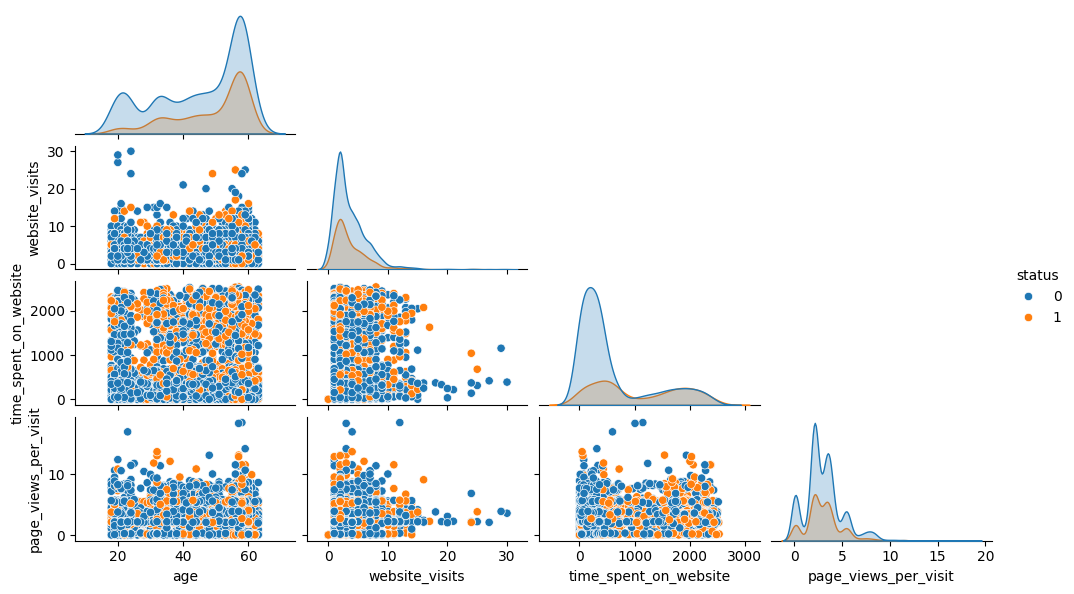

In [45]:
plt.figure(figsize=(5, 4))
sns.pairplot(data, height=1.5, aspect=1.7, corner=True, diag_kind="kde", hue="status")
plt.show()

##### Although the pairplot did not illustrate as much as it does sometimes, it does illustrate that the time spent on website is clearly relevant for those with more than 600 minutes. Namely, it seems than 50% of those leads will become paid customers.

#### Let's explore this even more in depth with a swarmplot

status
0    861
1    821
Name: count, dtype: int64


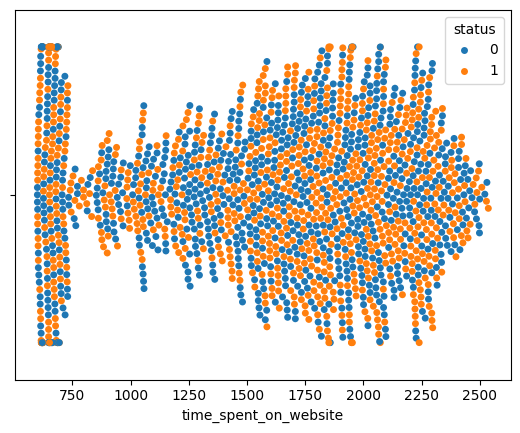

In [46]:
high_time_on_website = data[data["time_spent_on_website"] >= 600]
print(high_time_on_website["status"].value_counts())
sns.swarmplot(data=high_time_on_website, x="time_spent_on_website", hue="status")
plt.show()

##### This is indeed interesting and will probably be one of the first questions in the decision tree.
#### Let's explore if other categories have an impact on whether the lead becomes a customer depending on the answers.
To do so, 3 helper functions will be defined.

In [47]:
# Function that returns the order of the names of a dataframe.
def get_order_categories(data):
    names = []
    for i in data.index:
        if (i[0] not in names):
            names.append(i[0])
    return names # Order of the names in this dataframe.

In [48]:
# Creates a dataframe with proportion anc count of a category per status
def proportion_and_count(data, feature, hue="status"):
    data_proportion = data.groupby(feature)[hue].value_counts(normalize=True)*100
    data_count = data.groupby(feature)[hue].value_counts(normalize=False)
    joint_dataframe = pd.concat([data_proportion, data_count], axis=1)
    joint_dataframe = joint_dataframe.sort_values(by=[feature, hue])
    return joint_dataframe, get_order_categories(joint_dataframe)

In [49]:
# Creates countplot and prints the relative/absolute quantities of a given category.
def barplot_hued(data, feature, hue="status", figsize=None):
    if (figsize):
        plt.figure(figsize=figsize)
    joint_dataframe, ordered_names = proportion_and_count(data, feature, hue)
    print(joint_dataframe)
    sns.countplot(data=data, x=feature, hue=hue, order=ordered_names)
    plt.title(f"{feature} shown per {hue}")
    plt.show()

                           proportion  count
current_occupation status                   
Professional       0         64.48777   1687
                   1         35.51223    929
Student            0         88.28829    490
                   1         11.71171     65
Unemployed         0         73.42124   1058
                   1         26.57876    383


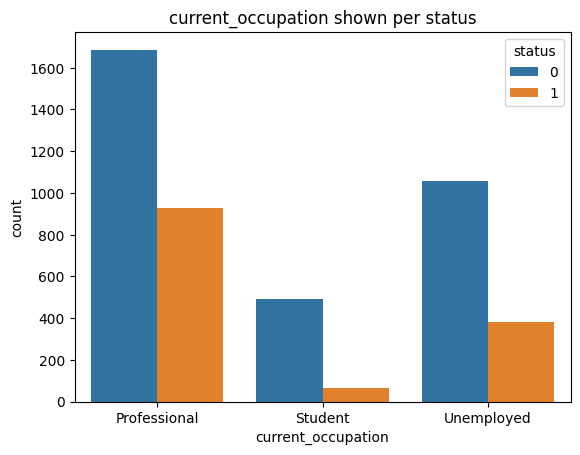

In [50]:
barplot_hued(data, "current_occupation", hue="status")

##### Observations on the relation between the Current Occupation and successful leads.
- It seems that students are unlikely to become paid customers (11.7%)
- About 27% of unemployed leads end up paying
- More than 35% of professionals (who happened to be the most common type of lead) end up becoming paid customers.

#### It will be therefore interesting evaluating if age can differentiate these 3 scenarios.

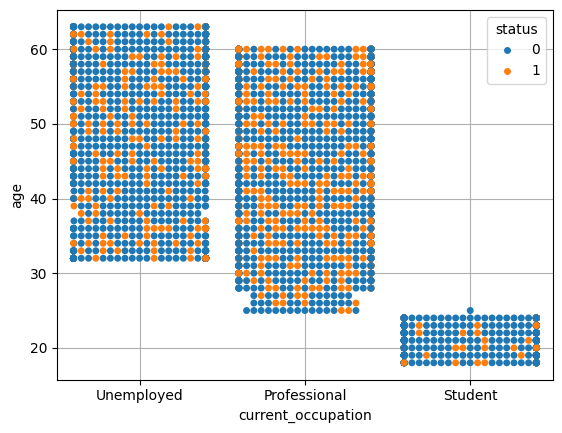

In [51]:
sns.swarmplot(data=data, x="current_occupation", y="age", hue="status")
plt.grid(visible=True, which="both", axis="both")
plt.show()

##### It seems that the age of a specific occupation doesn't play a big role. However, there is a clear distinction at ≈25 years old (by this age masters are usually finished. Probably PhDs are considered as Professionals.)



#### Let's take a look on the impact of the type of first impression.

                          proportion  count
first_interaction status                   
Mobile App        0         89.46860   1852
                  1         10.53140    218
Website           0         54.40598   1383
                  1         45.59402   1159


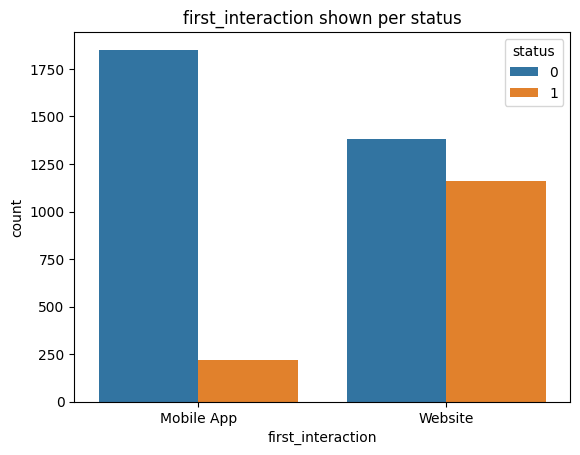

In [52]:
barplot_hued(data, "first_interaction", hue="status")

##### Observations on the relation between the type of First Interaction and successful leads.
- More people have the first impression through the Website
- **More than 45% of those who saw the Website first end up paying!**
- Only 10% of those who saw the Mobile App first end up paying.

#### Let's check if the level of Profile Completion plays a role.

                          proportion  count
profile_completed status                   
High              0         58.21555   1318
                  1         41.78445    946
Low               0         92.52336     99
                  1          7.47664      8
Medium            0         81.12450   1818
                  1         18.87550    423


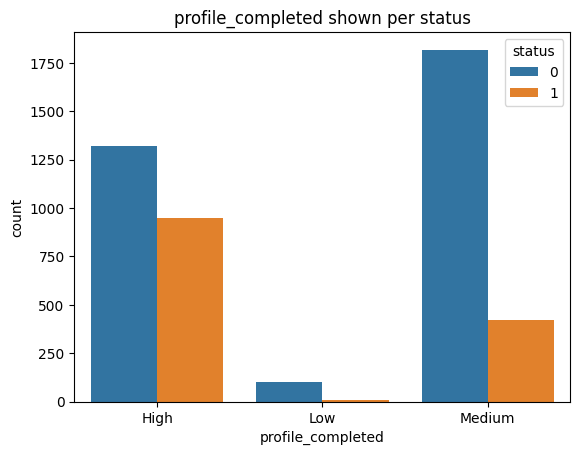

In [53]:
barplot_hued(data, "profile_completed", hue="status")

##### Observations on the relation between the level of Profile Completion and successful leads.
- Not only the absolute amount of paid customers increases with the level of profile completion, but also the relative amount of paid customers for a given level of profile completion increases (low_relative_proportion < medium_relative_proportion < high_relative_proportion <=> 7.5% < 18.9% < 41.8%).
- 4/10 leads who have a high level of profile completion become paid customers.

#### Let's check if the Pages Viewed and the amount of times a lead has Visited the Website are meaningful

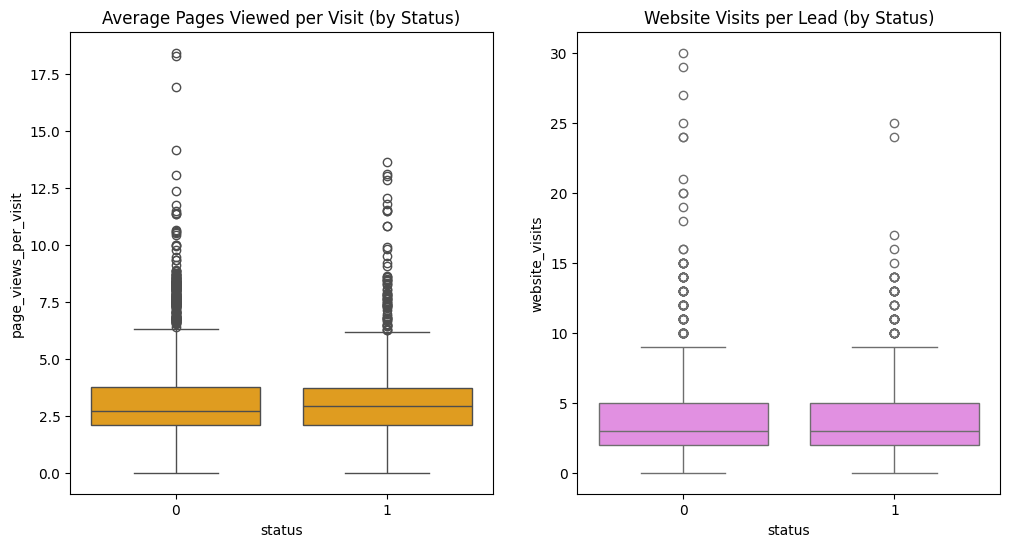

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=data, x="status", y="page_views_per_visit", color="orange", ax=axs[0])
sns.boxplot(data=data, x="status", y="website_visits", color="violet", ax=axs[1])
axs[0].set_title("Average Pages Viewed per Visit (by Status)")
axs[1].set_title("Website Visits per Lead (by Status)")
plt.show()

##### Observations regarding the Website visits, Average Page Viewed per visit and its relation to the successful customers
- The boxplots for both categories are very similar respectively.
- The outliers are reasonable for both categories.
- From the heatmap it is known that the distributions of each category (hued by the Status) are very similar respectively.
- Overall, these are **apparently** not very useful categories.

#### Let's check if the Last Activity has an impact on the number of successful leads

                         proportion  count
last_activity    status                   
Email Activity   0         69.66637   1587
                 1         30.33363    691
Phone Activity   0         78.68720    971
                 1         21.31280    263
Website Activity 0         61.54545    677
                 1         38.45455    423


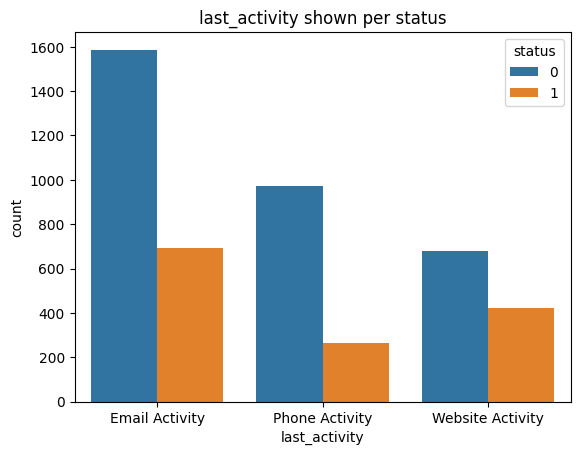

In [55]:
barplot_hued(data, "last_activity", hue="status")

##### Observations on whether the type of Last Activity has an impact on paid customers
- Most customers had their last activity via Email. From those, 30% became paid customers.
- Many customers had their last activity via their Phone. From those, only 21% became paid customers.
- Many customers had their last activity via the Website. From those, 38% became paid customers.
- It is pertinent to mention that the absolute paid customers per type also matter. Namely, even if it is known that if the last activity was through the Website, then statistically the leads are more likely to become customers, it is important to consider that from Email 691 leads became customers, from Website 423 became customers, and from a Phone activity only 263.
- If a customer had the last activity through a phone activity, then both in relative and absolute numbers, it is less likely yhat the lead will become a paid customer.

#### Let's find what is the best channel in terms of the (highest) lead conversion rate

##### Let's start with the channel of Newspaper

                          proportion  count
print_media_type1 status                   
Yes               0         68.00805    338
                  1         31.99195    159


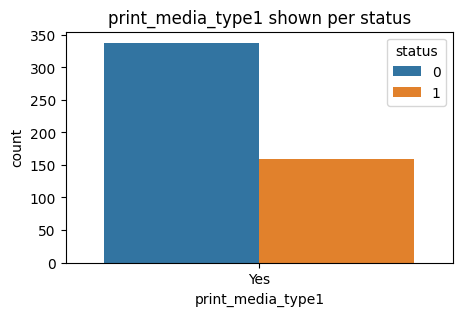

------------------------------------------------------------

                          proportion  count
print_media_type2 status                   
Yes               0         67.81116    158
                  1         32.18884     75


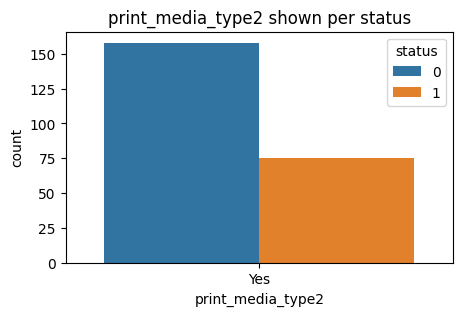

------------------------------------------------------------

                      proportion  count
digital_media status                   
Yes           0         68.12144    359
              1         31.87856    168


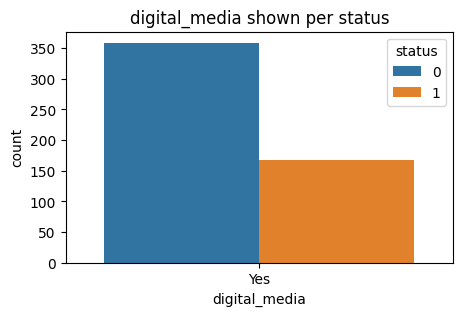

------------------------------------------------------------

                             proportion  count
educational_channels status                   
Yes                  0         72.05674    508
                     1         27.94326    197


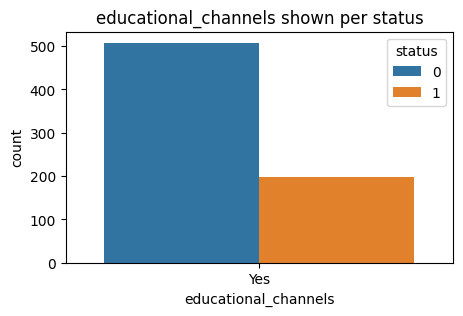

------------------------------------------------------------

                 proportion  count
referral status                   
Yes      0         32.25806     30
         1         67.74194     63


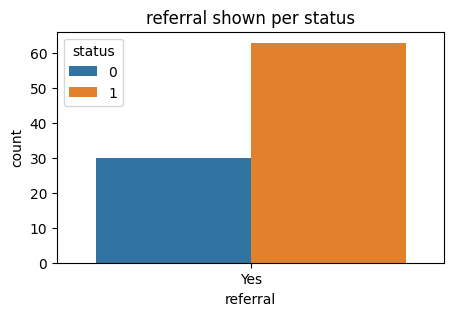

------------------------------------------------------------



In [56]:
channel_types = ["print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral"]
for channel in channel_types:
    barplot_hued(data[data[channel] == "Yes"], channel, hue="status", figsize=(5,3))
    print("-"*60 + "\n")

##### Observations on the channel used to get a lead
- Newspapers brought 159 paid customers representing 31.9% of those leads acquired by this channel.
- The Magazine brought 75 paid customers representing 32.2% of those leads acquired by this channel.
- Digital Platforms brought 168 paid customers representing 31.9% of those leads acquired by this channel.
- Educational Channels brought 197 paid customers representing 27.9% of those leads acquired by this channel.
- Newspaper brought 63 paid customers representing 67.7% of those leads acquired by this channel.
- **The highest lead conversion rate is clearly from Referrals**. In fact, referral's lead conversion rate is **more than twice** that of the second best channel.
- Educational Channels, Digital Platforms and Newspapers bring similar amount of paid customers.
- Magazines bring too few paid customers in comparison to the rest.

## Building a Decision Tree model

In [57]:
X = data.drop(["status"], axis=1)
Y = data["status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into train (80%) and test (20%) datasets.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 1)

In [58]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:") # Classes being 0 and 1
print(y_train.value_counts(normalize=True)) # How are the values relatively distributed
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3689, 16)
Shape of test set :  (923, 16)
Percentage of classes in training set:
status
0   0.70480
1   0.29520
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.68797
1   0.31203
Name: proportion, dtype: float64


### Understanding what would be a good model
We want a model that can predict which leads are more likely to become paid customers so that the economic and human efforts are optimized, and at the same time, generate more money.

#### All Scenarios
- **True Positive**: a lead is **predicted** as someone that **would become a paid customer**, actions are taken, and **this lead indeed becomes a paid customer**.
- **True Negative**: a lead is **predicted** as someone that **would not become a paid customer**, no actions are taken, and **this lead indeed does not become a paid customer**.
- **False Positive**: a lead is **predicted** as someone that **would become a paid customer**, actions are taken, and in fact this lead was incorrectly labeled because, **this lead will not become a paid customer**.
- **False Negative**: a lead is **predicted** as someone that **would not become a paid customer**, no actions are taken, and in fact this lead was incorrectly labeled because, **this lead** ***would have become*** **a paid customer**.

##### What is worse? Losing a potential customer because the prediction was wrong! The False Negatives should be reduced. Recall should be maximized!

Recall = True Positives / (True Positives + False Negatives)

A high Recall means that most of the positives (leads that will become paid customers) are indeed predicted as such. A high Recall implies a low number of False Negatives.

#### Let's define a function that gives a lot of metrics to evaluate the performance of a model

In [59]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### Building the Decision Tree Model
#### The sklearn.tree function *DecisionTreeClassifier* will be used (because the output is a discrete value).

In [60]:
d_tree = DecisionTreeClassifier(random_state=1)

# Fitting the model with tre training set
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Let's check the performance of the model on the training data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



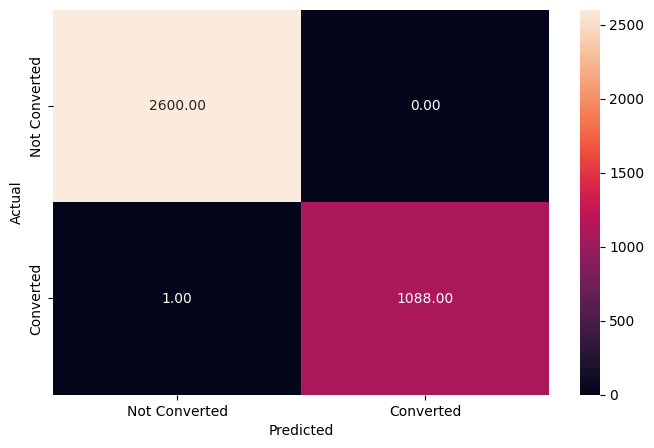

In [61]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(x_train)

metrics_score(y_train, y_pred_train1)

##### The model fits really well the training data. There is only one False Negative.
#### Let's see how the model performs on the test data

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       635
           1       0.71      0.70      0.71       288

    accuracy                           0.82       923
   macro avg       0.79      0.79      0.79       923
weighted avg       0.82      0.82      0.82       923



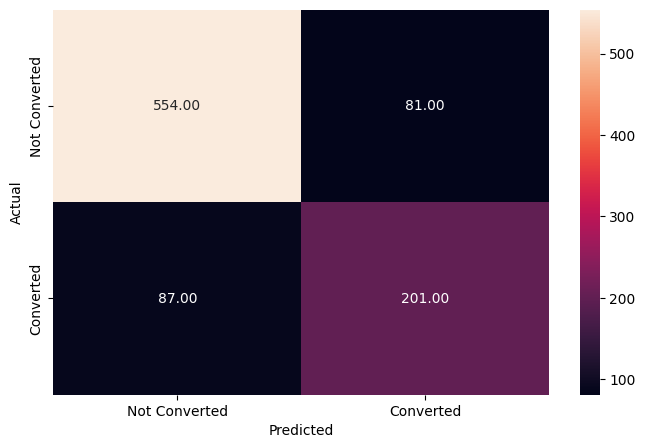

In [62]:
# Checking performance on the test data
y_pred_test1 = d_tree.predict(x_test)

metrics_score(y_test, y_pred_test1)

##### Observations on the model when fitted the test data:
- All the metrics show that the model is performing worse with the test dataset. Moreover, there is a Recall of 70%, which means than 3 out of every 10 leads that could become paid customers are incorrectly labeled.
- The model is overfitting the training dataset.

<Axes: xlabel='Importance', ylabel='None'>

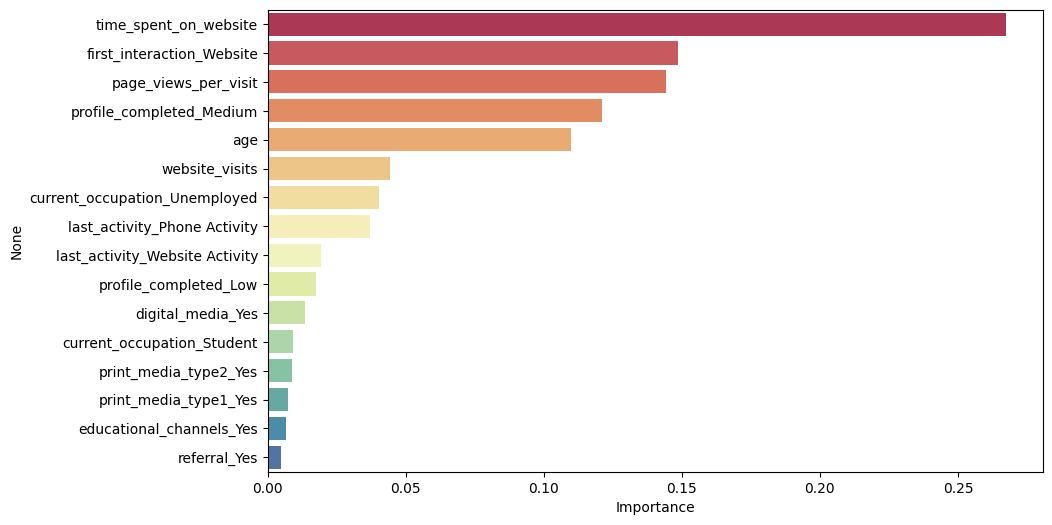

In [63]:
# Plot the feature importance

importances = d_tree.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 6))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index, palette="Spectral")

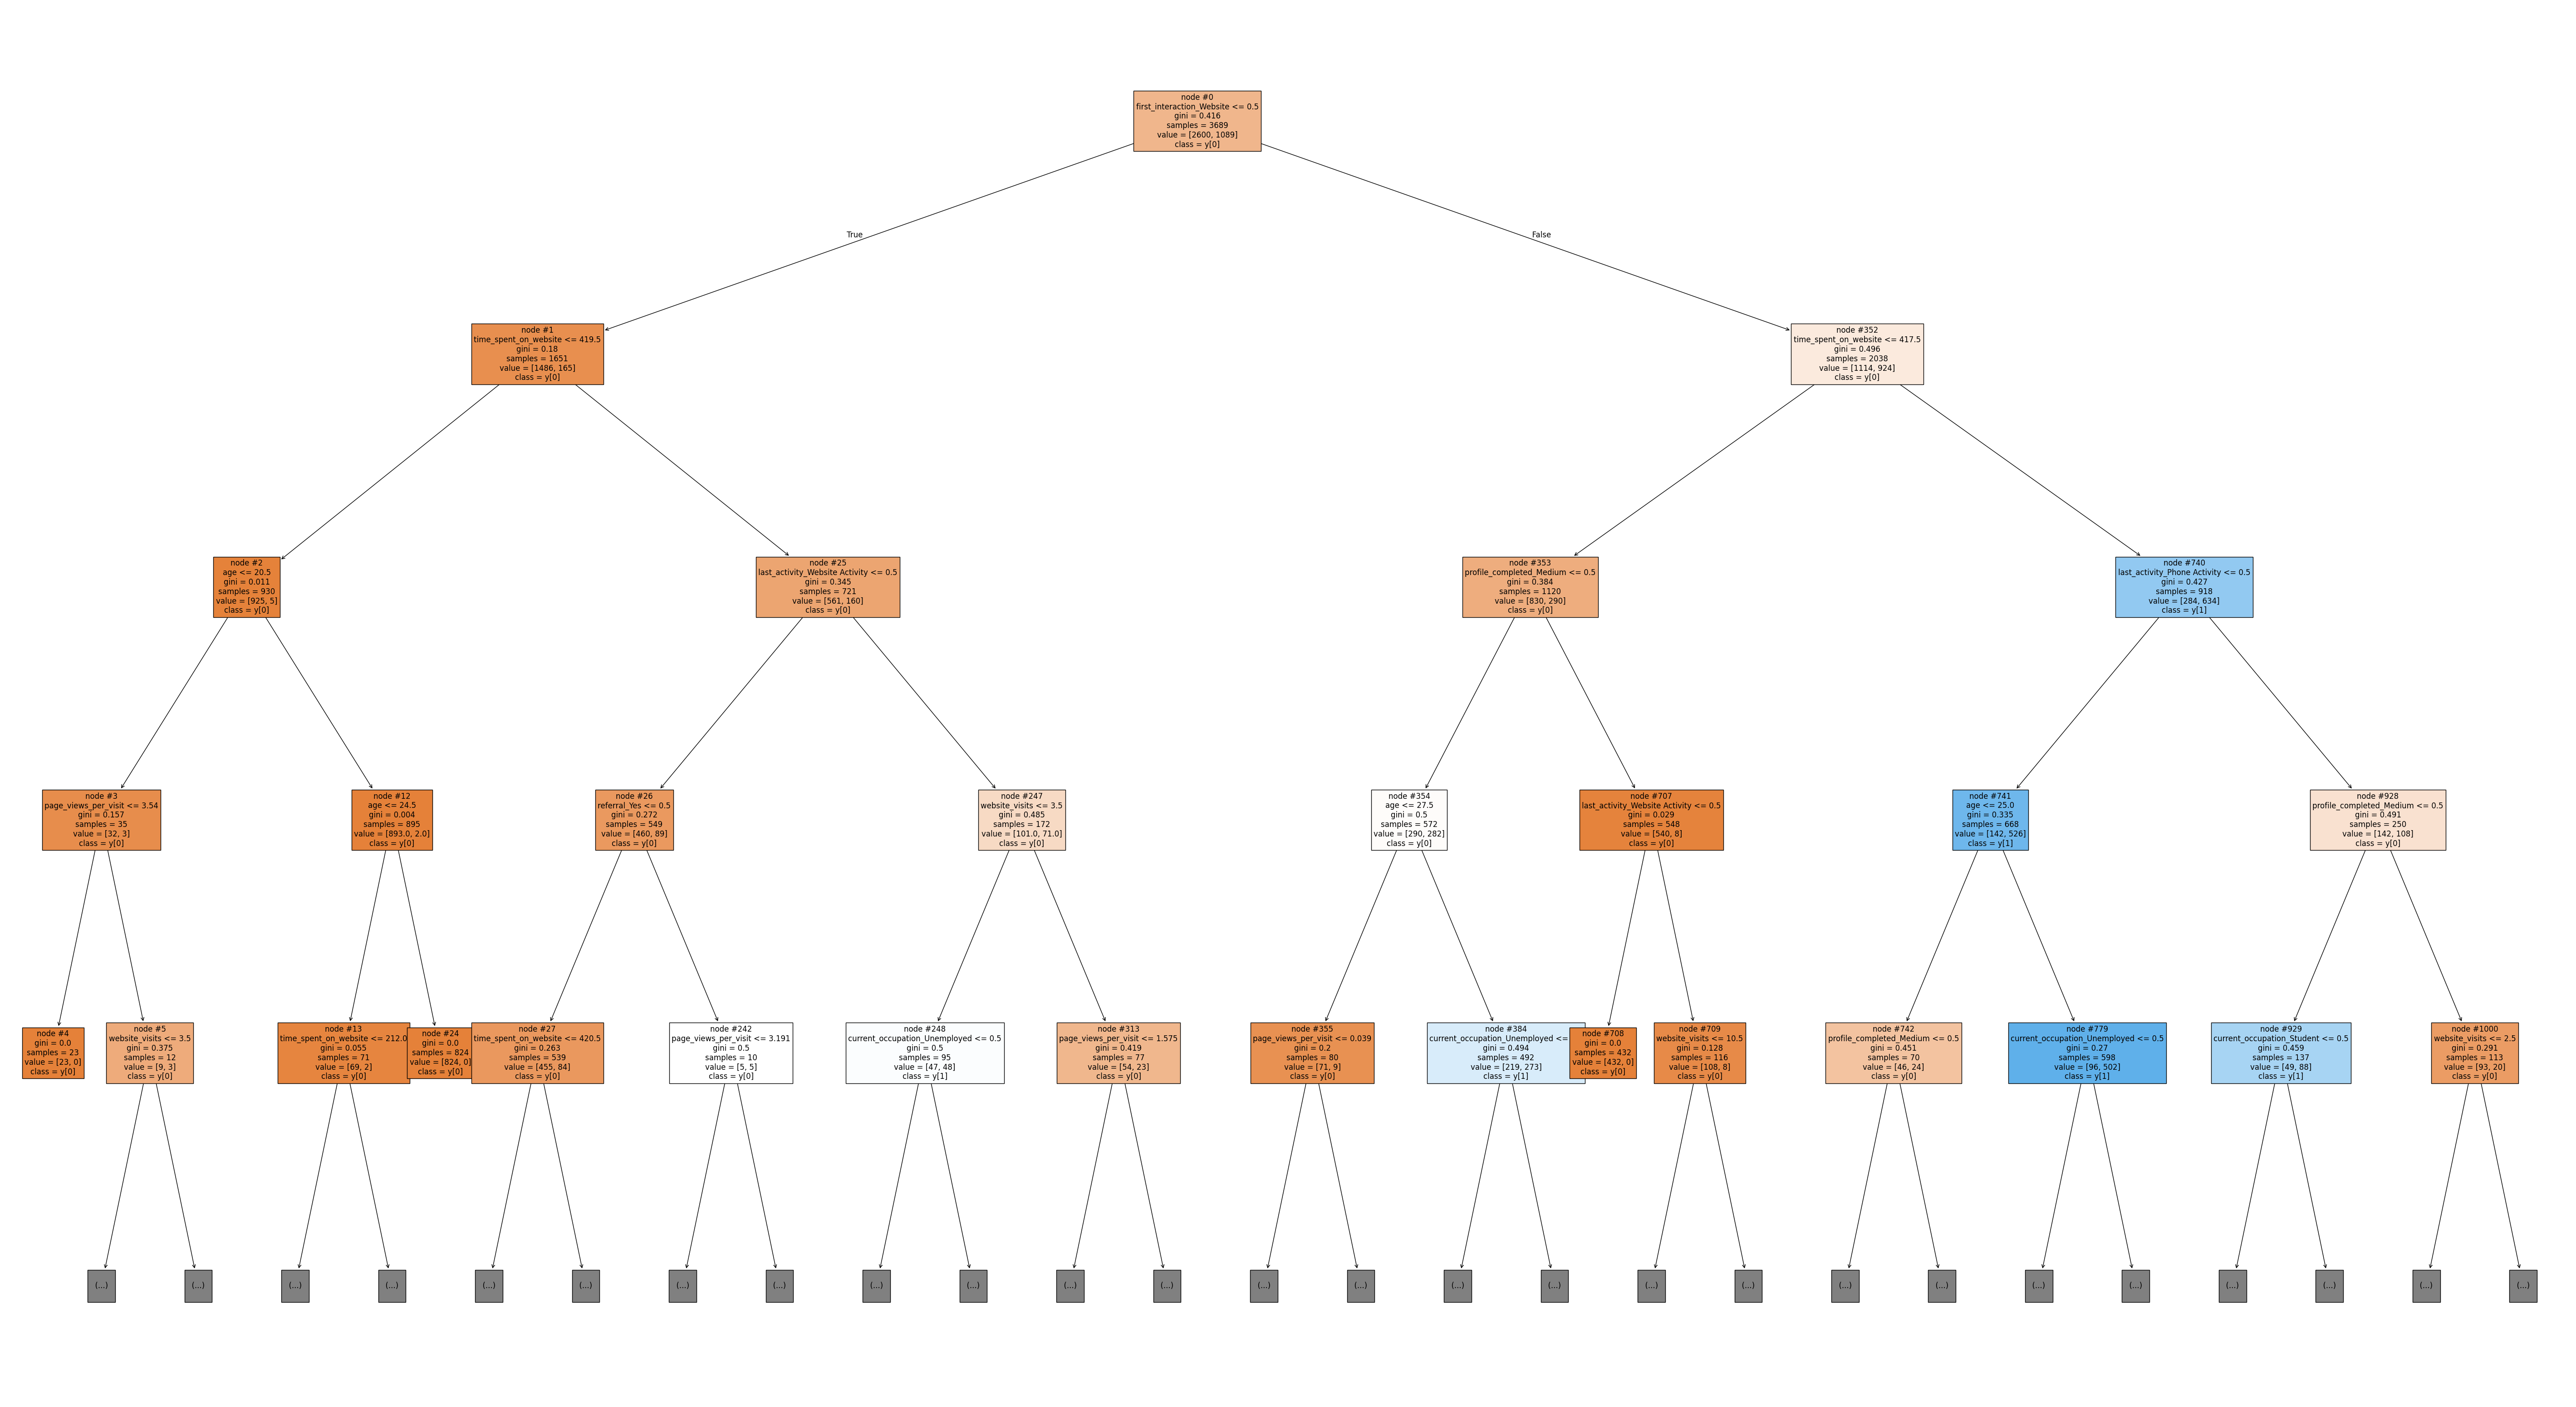

In [64]:
features = list(X.columns)

plt.figure(figsize = (73, 40))

tree.plot_tree(d_tree, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### Tuned using hyperparameters

In [65]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2600
           1       0.59      0.91      0.72      1089

    accuracy                           0.79      3689
   macro avg       0.77      0.82      0.77      3689
weighted avg       0.84      0.79      0.80      3689



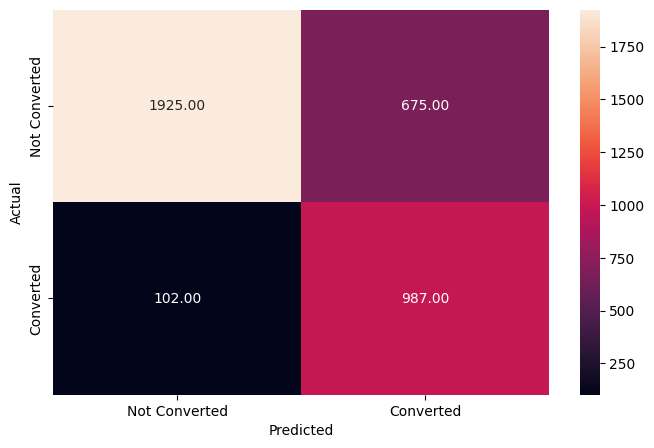

In [66]:
# Checking performance on the training data
y_pred_train1_tuned = d_tree_tuned.predict(x_train)

metrics_score(y_train, y_pred_train1_tuned)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       635
           1       0.61      0.88      0.72       288

    accuracy                           0.79       923
   macro avg       0.77      0.81      0.78       923
weighted avg       0.83      0.79      0.80       923



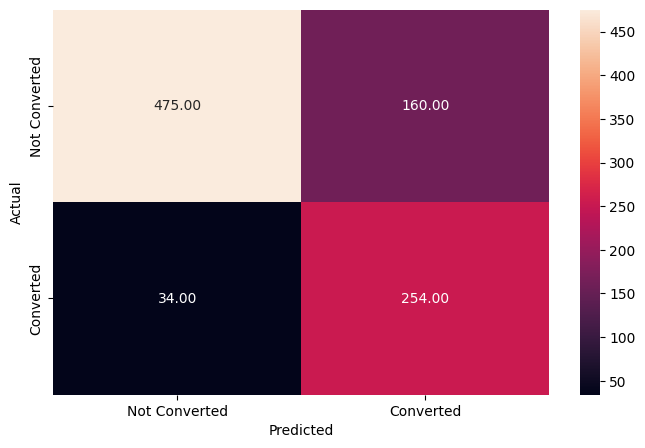

In [67]:
# Checking performance on the training data
y_pred_test1_tuned = d_tree_tuned.predict(x_test)

metrics_score(y_test, y_pred_test1_tuned)

<Axes: xlabel='Importance', ylabel='None'>

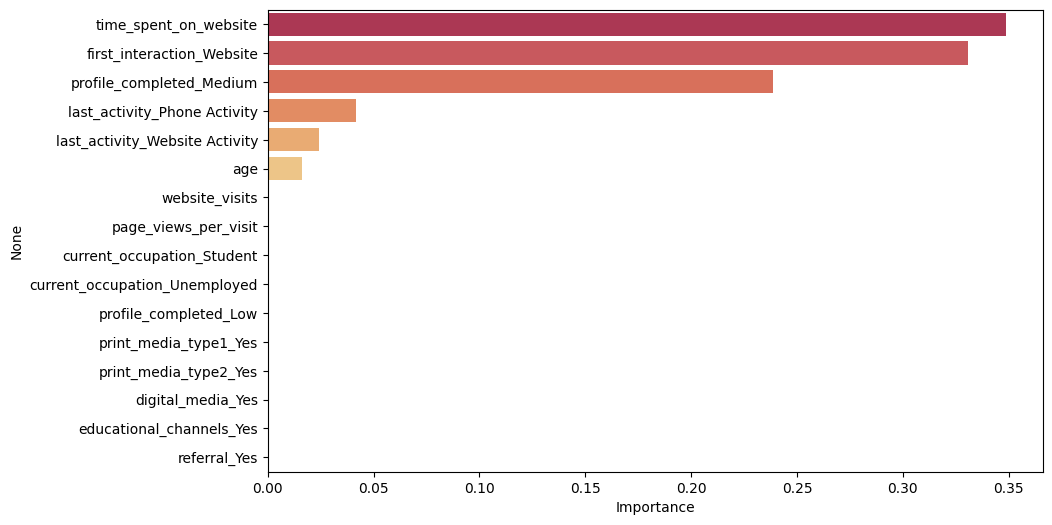

In [68]:
# Plot the feature importance

importances = d_tree_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 6))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index, palette="Spectral")

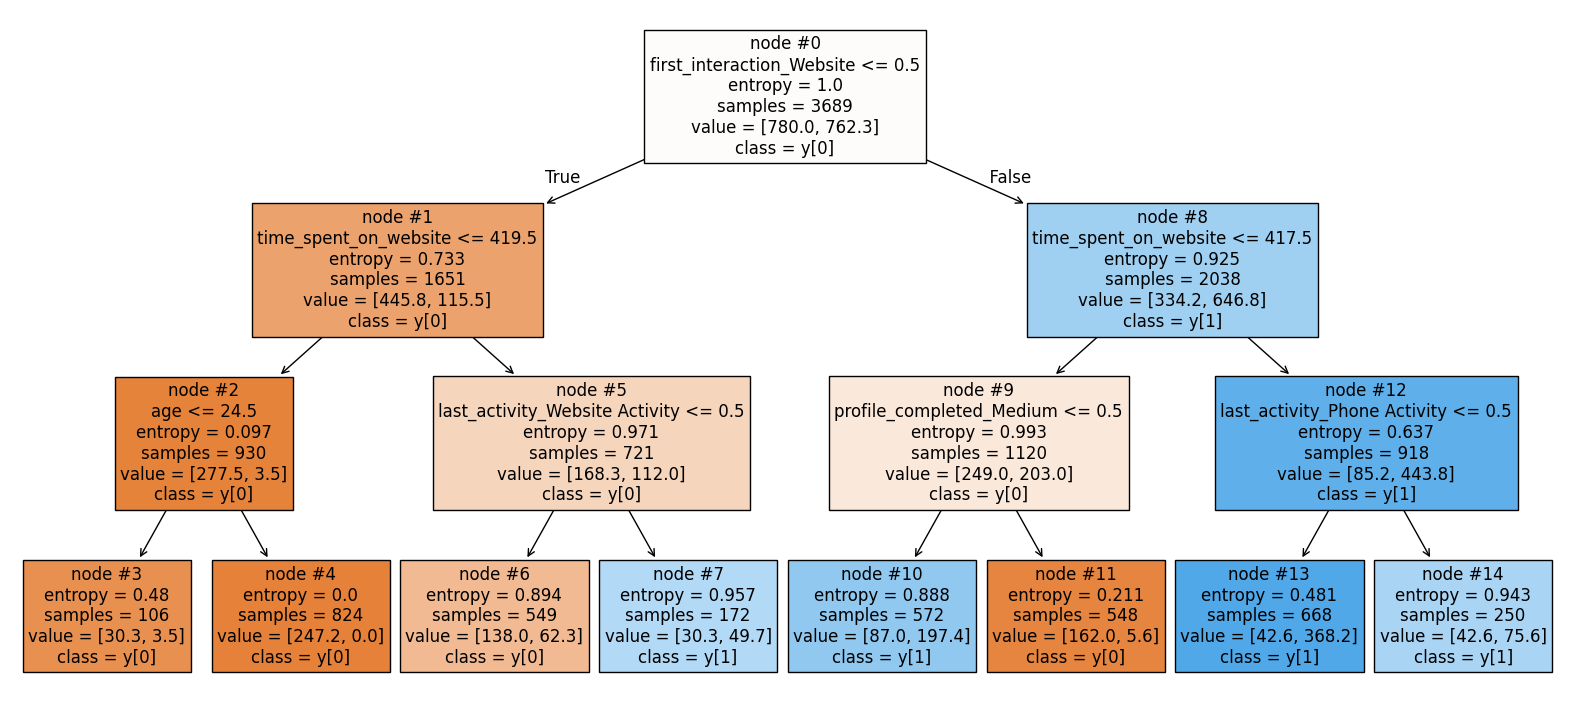

In [69]:
features = list(X.columns)

plt.figure(figsize = (20, 9))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations